In [3]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

# 1. 함수작성

In [4]:
# 데이터 불러오기
def read_log(filename):
    with open(filename, encoding = 'utf-8') as f:
        log_list = f.readlines()
    
    log_str = '//'.join(log_list)
    log_str = log_str.replace('\n','')  # 모든 개행 제거
    log_str = re.sub('\<\w+\>','',log_str)  # < > 요소 제거
    log_str = re.sub('\(\d+\w+\d+\w+\)','',log_str)  # (??시??분) 제거
    log_str = log_str[log_str.find('개의)')+3:]  # 개의) 보다 앞 내용 제거
    log_str = log_str[:log_str.find('산회)')-8]  # 산회) 보다 뒷 내용 제거
    
    log_list = re.split('//|  ',log_str)
    log_list = [log for log in log_list if log]
    
    return log_list

In [7]:
# text 내용 전처리
def log_regex(log_list):
    # 정규식 확인 사이트: https://regexr.com/
    log_speaker = re.compile('◯([\w]+ [\w]+)')
    log_parse_result = []
    speaker = ""
    
  
    # <>에 둘러싸인 표나 그림 제거
    for log in log_list:
        if len(log_speaker.findall(log))>0:
            # log에서 log_speaker와 일치하는 것을 모두 찾아라
            ## log_list의 각 행에서 log_speaker의 정규식과 일치하는 게 있다면:
               speaker = log_speaker.findall(log)
            # 찾은 log_speaker를 speaker에 assign
        else:
            log_parse_result.append([speaker[0],log])
    
    log_parse_result = pd.DataFrame(log_parse_result,
                                    columns = ['speaker','contents'])
    # log_parse_result.to_csv('C:/Users/user/python/local/Congress_Meeting_Log/result/result.csv',index = False)
    
    return log_parse_result

# 2. 코드실행 및 df 생성

In [8]:
log_raw1 = read_log('./raw/21_384_5.txt')
log_raw2 = read_log('./raw/21_384_7_0.txt')
log_raw3 = read_log('./raw/21_384_7_1.txt')

log_raw = log_raw1 + log_raw2 + log_raw3

In [9]:
df = log_regex(log_raw)
df['date'] = '2021'
df = df[['date','speaker','contents']]
df.head()

,date,speaker,contents
0,2021,의장 박병석,의석을 정돈해 주시기 바랍니다.
1,2021,의장 박병석,성원이 되었으므로 제5차 본회의를 개의하겠습니다.
2,2021,의장 박병석,보고사항은 회의록에 게재토록 하겠습니다.
3,2021,의장 박병석,(보고사항은 끝에 실음)
4,2021,의장 박병석,o 국무위원(중소벤처기업 권칠승) 인사


## 특정 키워드 카운트

In [10]:
(df['contents'].str.count('예비타당성').groupby(df['speaker'])
 .sum().sort_values(ascending=False))

speaker
곽상도 의원                   10
심상정 의원                    4
전재수 의원                    2
국토교통위원장대리 李憲昇             2
진성준 의원                    2
국토교통부장관 변창흠               1
金熙國 의원                    1
국토교통위원장대리 강준현             0
국토교통위원장대리 김교흥             0
법제사법위원장대리 최기상             0
법제사법위원장대리 전주혜             0
박형수 의원                    0
박수영 의원                    0
교육위원장대리 권인숙               0
문화체육관광위원장대리 이병훈           0
문화체육관광부장관 황희              0
김진애 의원                    0
김성환 의원                    0
김병욱 의원                    0
김기현 의원                    0
기획재정위원장대리 박홍근             0
보건복지위원장대리 서정숙             0
금융위원장 은성수                 0
권명호 의원                    0
교육위원장대리 배준영               0
국무총리 정세균                  0
보건복지위원장대리 강병원             0
홍정민 의원                    0
부의장 김상희                   0
정경희 의원                    0
허은아 의원                    0
행정안전위원장대리 한병도             0
행정안전위원장대리 오영훈             0
한무경 의원                    0
최혜영 의원                    0
최형두 의원      

# 3. 워드클라우드 작성

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.utils import pprint
from konlpy.tag import Okt
from collections import Counter
%matplotlib inline

In [146]:
okt = Okt()
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2HDRM.TTF',
               background_color = 'white',
               width=4000, height=3000)

In [143]:
df_yeta = df.loc[df.contents.str.contains('예비타당성')]
text = ' '.join(df_yeta['contents'])

In [153]:
# df_yeta.to_csv('C:/Users/user/python/local/Congress_Meeting_Log/result/df_yeta.csv',index=False)

In [144]:
noun = okt.nouns(text)
for i,v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)
count = Counter(noun)
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('타당성조사', 30)
('사업', 30)
('공항', 24)
('예비', 22)
('면제', 15)
('건설', 12)
('추진', 12)
('가덕도', 10)
('예정', 6)
('지역', 6)
('국책', 6)
('제도', 6)
('재정', 6)
('법안', 4)
('의원', 4)
('법률', 4)
('절차', 4)
('주변', 4)
('시행', 4)
('효율', 4)
('최대', 4)
('소요', 4)
('합의', 4)
('무력', 4)
('정부', 4)
('부작용', 4)
('예산', 4)
('입지', 4)
('결정', 4)
('대통령', 4)
('특별법', 4)
('대한', 3)
('다음', 2)
('특별', 2)
('대안', 2)
('박수영', 2)
('한정애', 2)
('각각', 2)
('대표', 2)
('발의', 2)
('건의', 2)
('제정', 2)
('통합', 2)
('조정', 2)
('주요', 2)
('내용', 2)
('규정', 2)
('범위', 2)
('개발', 2)
('지정', 2)
('공사', 2)
('물품', 2)
('용역', 2)
('계약', 2)
('체결', 2)
('관할', 2)
('인근', 2)
('지방자치단체', 2)
('영업소', 2)
('우대', 2)
('국토교통부', 2)
('건립', 2)
('추진단', 2)
('도록', 2)
('것', 2)
('추정', 2)
('초대형', 2)
('특례조항', 2)
('포함', 2)
('소관', 2)
('상임', 2)
('위인', 2)
('국토', 2)
('교통', 2)
('위원회', 2)
('심사', 2)
('소위', 2)
('논의', 2)
('당시', 2)
('당초', 2)
('여야', 2)
('최대한', 2)
('단축', 2)
('처리', 2)
('결론', 2)
('사안', 2)
('로', 2)
('의결', 2)
('기존', 2)
('손바닥', 2)
('번복', 2)
('조항', 2)
('문재인', 2)
('여당', 2)
('매우', 2)
('알', 2)
('반증', 2)


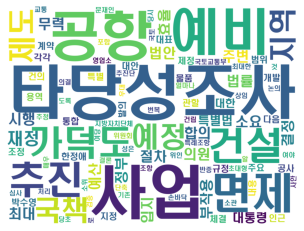

<Figure size 432x288 with 0 Axes>

In [150]:
plt.imshow(wc.generate_from_frequencies(dict(noun_list)))
plt.axis('off')
plt.show()

# 소속당 추가

In [67]:
partymem17 = pd.read_csv('C:/Users/user/python/local/Congress_Meeting_Log/data/patymem17.csv')
partymem17

,party,name,start,end
0,통합민주당 (前 열린우리당 & 대통합민주신당),강기정,2004-05-30,2008-05-29
1,통합민주당 (前 열린우리당 & 대통합민주신당),강봉균,2004-05-30,2008-05-29
2,통합민주당 (前 열린우리당 & 대통합민주신당),강성종,2004-05-30,2008-05-29
3,통합민주당 (前 열린우리당 & 대통합민주신당),강창일,2004-05-30,2008-05-29
4,통합민주당 (前 열린우리당 & 대통합민주신당),강혜숙,2004-05-30,2008-05-29
...,...,...,...,...
293,무소속,이계안,2004-05-30,2008-05-29
294,무소속,이해찬,2004-05-30,2008-05-29
295,무소속,임종인,2004-05-30,2008-05-29
296,무소속,임채정,2004-05-30,2008-05-29


In [11]:
for i in range(len(df)):
    df['speaker_split1'] = df.speaker[i].split(' ')[0]
    df['speaker_split2'] = df.speaker[i].split(' ')[1]

df

,date,speaker,contents,speaker_split1,speaker_split2
0,2009-11-26,위원장 이병석,의석을 정돈해 주시기 바랍니다.,위원장,이병석
1,2009-11-26,위원장 이병석,성원이 되었으므로 제284회 국회(정기회) 제8차 국토해양위원회를 개의합니다.,위원장,이병석
2,2009-11-26,위원장 이병석,오늘은 여야 간 합의에 따라서 상정을 유보한 2010년도 예산안 등을 심사하도록 하...,위원장,이병석
3,2009-11-26,위원장 이병석,오늘 회의가 원만하게 개회될 수 있도록 정치력을 발휘해 주신 양당 간사 위원님들을 ...,위원장,이병석
4,2009-11-26,위원장 이병석,또 본인 위원장으로서도 그동안 인내심을 가지고 여야가 충분한 대화를 통해서 원만하게...,위원장,이병석
...,...,...,...,...,...
2131,2009-11-26,위원장 이병석,오늘 여러 위원님들로부터 서면질의가 있었습니다. 정부 측에서는 이 서면질의에 대해서...,위원장,이병석
2132,2009-11-26,위원장 이병석,서면질의와 답변서 내용은 오늘 회의록에 모두 게재하도록 하겠습니다.,위원장,이병석
2133,2009-11-26,위원장 이병석,오늘 의사일정을 모두 마쳤습니다.,위원장,이병석
2134,2009-11-26,위원장 이병석,산회하고자 합니다.,위원장,이병석
